# Machine learning to predict molecule properties : solubility



The solubility of molecules is an important property in many applications like for drug selection or for compound selection for battery designes (no link to health).

Being able to predict the solubility of a molecule from its formula instead of having to make measuring experiment in an important aspect to enhanced fatester molecule discovery.

In this notebook we will do basic solubility prediction with machine learning models and rdkit


Install the python rdkit package with pip or conda

cf https://www.rdkit.org/docs/index.html

In [1]:
!pip install rdkit-pypi

Defaulting to user installation because normal site-packages is not writeable


# Molecule representations with Rdkit

Rdkit is a package allowing to work with molecule data and their representation. 

For basic manipulations, the main submodule is **Chem**



### Smile representation

Smile lets represent molecules with text strings




The following string contains the SMILE representation of the paracetamol molecule

In [2]:
smile = 'CC(=O)NC1=CC=C(O)C=C1'

import rdkit and the Chem submodule

In [3]:
import rdkit
import rdkit.Chem

Using the MolFromSmiles function, create a molecule from the smile representation and print its types

In [4]:
mol = rdkit.Chem.MolFromSmiles(smile)
print(type(mol))

<class 'rdkit.Chem.rdchem.Mol'>


With the MolToImage function of the Draw package, display the molecule

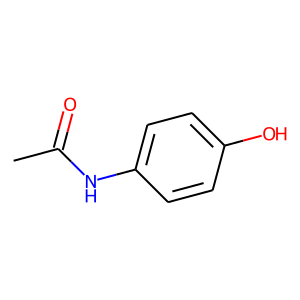

In [5]:
rdkit.Chem.Draw.MolToImage(mol)

You can get the Number of atoms of the molecules and the list of atoms with the methods GetNumAtoms and getAtoms.

Print the number of atoms of the molecule

In [6]:
print(mol.GetNumAtoms())
print(len(mol.GetAtoms()))

11
11


If you compare to the picture, you may see that the number of atoms is not 11. What is the total number and why rdkit do not give the same answer ?

<p style="color: red">
    Le nombre d'atomes prend en compte tous les atomes qui ne sont pas du type hydrogène (H).
</p>

Print the list of each atoms

In [7]:
for atom in mol.GetAtoms():
    print(atom.GetSymbol(), end=", ")

C, C, O, N, C, C, C, C, O, C, C, 

<p style="color: red">
    On a bien la confirmation de la réponse précédente.
</p>

Store the number of bonds of the molecule in **n_bond** (look which method can be used for that) and print

In [8]:
n_bond = mol.GetNumBonds()
print(n_bond)

11


For each bond, print if the bond is single or double

In [9]:
for bond in mol.GetBonds():
    print(bond.GetIdx(), bond.GetBondType())

0 SINGLE
1 DOUBLE
2 SINGLE
3 SINGLE
4 AROMATIC
5 AROMATIC
6 AROMATIC
7 SINGLE
8 AROMATIC
9 AROMATIC
10 AROMATIC


### Reading molecule data from file

Apart SMILES, .SDF/ .Mol are also the common formats to save molecules. RDKit provides also functionalities to read these files.


Morphine is an opioid agonist used for the relief of moderate to severe acute and chronic pain. The chemical information of this drug can be found at 
"https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf". 


Download this file and save it in a folder. 



In [10]:
!wget https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf

--2022-04-16 18:22:49--  https://go.drugbank.com/structures/small_molecule_drugs/DB00295.sdf
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving go.drugbank.com (go.drugbank.com)... 172.66.42.250, 172.66.41.6, 2606:4700:3108::ac42:2906, ...
Connecting to go.drugbank.com (go.drugbank.com)|172.66.42.250|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/plain]
Saving to: ‘DB00295.sdf.6’

DB00295.sdf.6           [ <=>                ]   7.48K  --.-KB/s    in 0.003s  

2022-04-16 18:22:50 (2.74 MB/s) - ‘DB00295.sdf.6’ saved [7662]




Read the morphine molecule from the file that you've downloaded using "rdkit.Chem.SDMolSupplier" and store the result in a variable named **morphine**



In [11]:
my_mols = rdkit.Chem.SDMolSupplier("DB00295.sdf")
morphine = my_mols[0]

Display its type

In [12]:
print(type(morphine))

<class 'rdkit.Chem.rdchem.Mol'>


Display the picture of the molecule


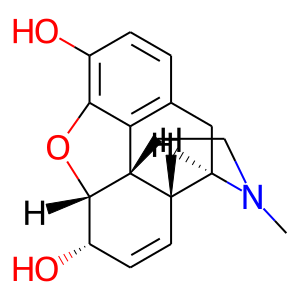

In [13]:
rdkit.Chem.Draw.MolToImage(morphine)

Display the number of atoms and the number of bonds

In [14]:
print("Number of atoms:", morphine.GetNumAtoms())
print("Number of bonds:", morphine.GetNumBonds())

Number of atoms: 21
Number of bonds: 25


### Descriptors 


Molecules are also described by a set of physiochemical descriptors like 
- the log partition coefficient,
- the polar surface area ... that describe the molecule's structure.


RDKit provides utilities that allow us to compute descriptor of molecules.

The rdkit.ML.Descriptors module and its sub module let us compute molecule descriptors.

the rdkit.ML.Descriptors module has an attribute name \_descList, display it

In [15]:
from rdkit.Chem import Descriptors

Descriptors.descList

[('MaxEStateIndex',
  <function rdkit.Chem.EState.EState.MaxEStateIndex(mol, force=1)>),
 ('MinEStateIndex',
  <function rdkit.Chem.EState.EState.MinEStateIndex(mol, force=1)>),
 ('MaxAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MaxAbsEStateIndex(mol, force=1)>),
 ('MinAbsEStateIndex',
  <function rdkit.Chem.EState.EState.MinAbsEStateIndex(mol, force=1)>),
 ('qed',
  <function rdkit.Chem.QED.qed(mol, w=QEDproperties(MW=0.66, ALOGP=0.46, HBA=0.05, HBD=0.61, PSA=0.06, ROTB=0.65, AROM=0.48, ALERTS=0.95), qedProperties=None)>),
 ('MolWt', <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>),
 ('HeavyAtomMolWt', <function rdkit.Chem.Descriptors.HeavyAtomMolWt(x)>),
 ('ExactMolWt', <function rdkit.Chem.Descriptors.<lambda>(*x, **y)>),
 ('NumValenceElectrons',
  <function rdkit.Chem.Descriptors.NumValenceElectrons(mol)>),
 ('NumRadicalElectrons',
  <function rdkit.Chem.Descriptors.NumRadicalElectrons(mol)>),
 ('MaxPartialCharge',
  <function rdkit.Chem.Descriptors.MaxPartialCharge(mo

Compute all descriptors in the _descList list of the paracetamol molecule using the MoleculeDescriptors.MolecularDescriptorCalculator class

In [16]:
from rdkit.ML.Descriptors.MoleculeDescriptors import MolecularDescriptorCalculator
descriptor_names = [name for name, _ in Descriptors._descList]
calculator = MolecularDescriptorCalculator(descriptor_names)

Display the names and the fvalues of the descriptors

In [17]:
calculator.CalcDescriptors(mol)

(10.524468537414966,
 -0.11510204081632636,
 10.524468537414966,
 0.11510204081632636,
 0.5950261967780849,
 151.165,
 142.093,
 151.063328528,
 58,
 0,
 0.22074743631242583,
 -0.5079643157925783,
 0.5079643157925783,
 0.22074743631242583,
 1.3636363636363635,
 1.9090909090909092,
 2.3636363636363638,
 16.25468871437965,
 10.280190859964755,
 1.9280360590359866,
 -1.9945540738765895,
 2.12524757916018,
 -2.04401131261029,
 5.88095478459792,
 -0.11373578338266109,
 2.7362980721056545,
 253.29949758389105,
 8.267584713501616,
 6.164862962722325,
 6.164862962722325,
 5.1815405503520555,
 3.2490981480278296,
 3.2490981480278296,
 2.228060242189872,
 2.228060242189872,
 1.1876733148984595,
 1.1876733148984595,
 0.7480265991539318,
 0.7480265991539318,
 -1.5099999999999998,
 285.51074052739676,
 7.595374077976819,
 3.0531381005525,
 2.292303972882069,
 64.66690538413799,
 10.423315998847038,
 5.749511833283905,
 0.0,
 5.907179729351506,
 0.0,
 0.0,
 4.794537184071822,
 0.0,
 0.0,
 0.0,
 0.0,

### Fingerprinting


A chemical structure can be characterized by a set of numerical values known as molecular fingerprints. They may be 2D Fragment-based fingerprints presented by bit arrays of 0s and 1s wherein each bit position indicates the presence or absence of structural fragments.


The RDKit has a variety of built-in functionality for generating molecular fingerprints and then using them to calculate molecular similarity. In this exercise, we will generate the fingerprints for parcetamol and aspirin that are two popular drugs used for pains.





With the help of rdkit.Chem.AllChem.GetMorganFingerprintAsBitVect, compute its fingerprint as a bit vector. 

In [18]:
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
fingerprint = GetMorganFingerprintAsBitVect(mol, 2)

Display its type

In [19]:
type(fingerprint)

rdkit.DataStructs.cDataStructs.ExplicitBitVect

With the DataStructs module convert it to a numpy vector and display it shape and display it

In [20]:
from rdkit.DataStructs import ConvertToNumpyArray
import numpy as np
arr = np.zeros((0,), dtype=np.int8)
ConvertToNumpyArray(fingerprint, arr)

print("Shape : ", arr.shape)
print(arr)

Shape :  (2048,)
[0 0 0 ... 0 0 0]


Create a function smiles_to_np_morganfingerprinting which takes a smile representation and gives back the numpy version of the morgan finger_printing

In [21]:
def smiles_to_np_morganfingerprinting(smile):
    my_mol = rdkit.Chem.MolFromSmiles(smile)
    res = np.zeros((0,), dtype=bool)
    my_fingerprint = GetMorganFingerprintAsBitVect(my_mol, 2)
    ConvertToNumpyArray(my_fingerprint, res)
    return res

Compute the morgan finger printing of the aspirin (CC(=O)OC1=CC=CC=C1C(O)=O) and paracetamol (CC(=O)NC1=CC=C(O)C=C1)

In [22]:
mgfp_aspirin = smiles_to_np_morganfingerprinting("CC(=O)OC1=CC=CC=C1C(O)=O")
mgfp_paracetamol = smiles_to_np_morganfingerprinting("CC(=O)NC1=CC=C(O)C=C1")

Compute the DiceSimilarity of the two molecules

<p style="color: red">
    La distance de Dice est calculable dans rdkit, mais pas depuis des objets de type ndarray. On utilise donc la biliothèque Scipy dans notre cas.
</p>

In [23]:
from scipy.spatial.distance import dice
dice(mgfp_aspirin, mgfp_paracetamol)

0.6363636363636364

### SMART

In many commonly used applications, we need to determine whether atoms in a molecule match a particular pattern. It can be used for filtering structures or identifying substructures that are associated with toxicological problem.

SMART us an extension of the SMILES language that can be used to create queries.



Find molecules in the following list named "smiles_list" that contain the "CCC" pattern (you can use the GetSubstructMatch class).


<p style="color: red">
    Faisons nous notre propre liste de molécules à partir de la page wikipédia :
    https://en.wikipedia.org/wiki/Simplified_molecular-input_line-entry_system
</p>

In [24]:
smiles_list = ["O=Cc1ccc(O)c(OC)c1",
                "CC(=O)NCCC1=CNc2c1cc(OC)cc2",
                "CCc(c1)ccc2[n+]1ccc3c2[nH]c4c3cccc4",
                "N#N",
                "CN=C=O",
                "CC(=O)OCCC(/C)=C\C[C@H](C(C)=C)CCC=C",
                "CC[C@H](O1)CC[C@@]12CCCO2"]

In [25]:
pattern = rdkit.Chem.MolFromSmarts('CCC')

for i, smile in enumerate(smiles_list):
    mol = rdkit.Chem.MolFromSmiles(smile)
    print(f"Molécule {i}, nombre de matches : {len(mol.GetSubstructMatches(pattern))}")

Molécule 0, nombre de matches : 0
Molécule 1, nombre de matches : 0
Molécule 2, nombre de matches : 0
Molécule 3, nombre de matches : 0
Molécule 4, nombre de matches : 0
Molécule 5, nombre de matches : 9
Molécule 6, nombre de matches : 7




Highlight the pattern "CCC" in these molecules.



In [26]:
from IPython.display import SVG
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import Image

def highlight(smi, pattern='CCC'):
    filename = "out.png"
    mol = rdkit.Chem.MolFromSmiles(smi)
    patt = rdkit.Chem.MolFromSmarts(pattern)
    hit_ats = list(mol.GetSubstructMatch(patt))
    hit_bonds = []
    for bond in patt.GetBonds():
        aid1 = hit_ats[bond.GetBeginAtomIdx()]
        aid2 = hit_ats[bond.GetEndAtomIdx()]
        hit_bonds.append(mol.GetBondBetweenAtoms(aid1,aid2).GetIdx())
    print(hit_bonds)
    drawer = rdMolDraw2D.MolDraw2DCairo(500, 500) # or MolDraw2DCairo to get PNGs
    rdMolDraw2D.PrepareAndDrawMolecule(drawer, mol, highlightAtoms=hit_ats, highlightBonds=hit_bonds)
    drawer.FinishDrawing()
    drawer.WriteDrawingText(filename)
    return Image(filename)

[4, 5]


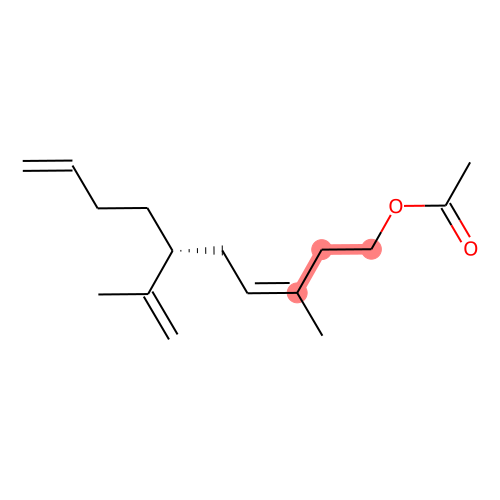

In [36]:
highlight(smiles_list[-2], "CCC")

[0, 1]


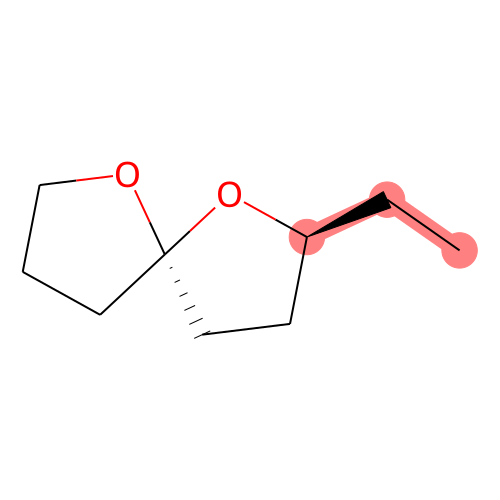

In [35]:
highlight(smiles_list[-1], "CCC")


Do the same thing ex 1 but for the pattern "C(=O)N".

In [37]:
pattern = rdkit.Chem.MolFromSmarts('C(=O)N')

for i, smile in enumerate(smiles_list):
    mol = rdkit.Chem.MolFromSmiles(smile)
    print(f"Molécule {i}, nombre de matches : {len(mol.GetSubstructMatches(pattern))}")

Molécule 0, nombre de matches : 0
Molécule 1, nombre de matches : 1
Molécule 2, nombre de matches : 0
Molécule 3, nombre de matches : 0
Molécule 4, nombre de matches : 0
Molécule 5, nombre de matches : 0
Molécule 6, nombre de matches : 0


[1, 2]


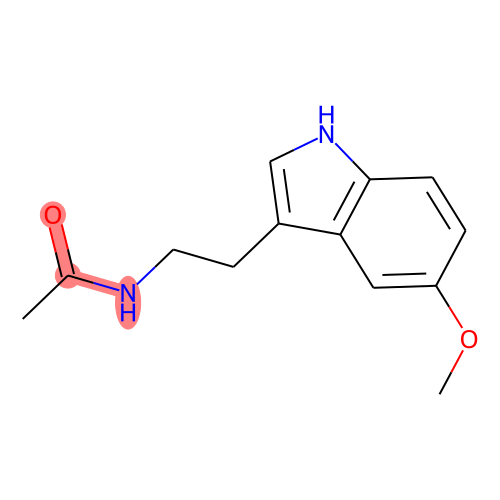

In [39]:
highlight(smiles_list[1], "C(=O)N")